In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD, Adam
import seaborn as sns
%matplotlib inline

In [2]:
stock_list = ['QQQ','NVDA','AAPL']

In [3]:
df_QQQ = yf.download("QQQ", start="2015-01-01", end="2023-04-01", interval="1d")
df_NVDA = yf.download("NVDA", start="2015-01-01", end="2023-04-01", interval="1d")
df_AAPL= yf.download("AAPL", start="2015-01-01", end="2023-04-01", interval="1d")
df_QQQ['company_name']='QQQ'
df_NVDA['company_name']='NVDA'
df_AAPL['company_name']='AAPL'
df_QQQ=df_QQQ.reset_index(drop=False)
df_NVDA=df_NVDA.reset_index(drop=False)
df_AAPL=df_AAPL.reset_index(drop=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df=pd.concat([df_QQQ,df_NVDA,df_AAPL])
df

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2015-01-02,103.760002,104.199997,102.440002,102.940002,96.344223,31314600,QQQ
1,2015-01-05,102.489998,102.610001,101.139999,101.430000,94.930969,36521300,QQQ
2,2015-01-06,101.580002,101.750000,99.620003,100.070000,93.658134,66205500,QQQ
3,2015-01-07,100.730003,101.599998,100.489998,101.360001,94.865463,37577400,QQQ
4,2015-01-08,102.220001,103.500000,102.110001,103.300003,96.681160,40212600,QQQ
...,...,...,...,...,...,...,...,...
2071,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300,AAPL
2072,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200,AAPL
2073,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700,AAPL
2074,2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700,AAPL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 2075
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6228 non-null   datetime64[ns]
 1   Open          6228 non-null   float64       
 2   High          6228 non-null   float64       
 3   Low           6228 non-null   float64       
 4   Close         6228 non-null   float64       
 5   Adj Close     6228 non-null   float64       
 6   Volume        6228 non-null   int64         
 7   company_name  6228 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 437.9+ KB


In [6]:
df_close=df[['Date','Adj Close','company_name']]
df_close=df_close.set_index('Date')
df_close

,Adj Close,company_name
Date,,
2015-01-02,96.344223,QQQ
2015-01-05,94.930969,QQQ
2015-01-06,93.658134,QQQ
2015-01-07,94.865463,QQQ
2015-01-08,96.681160,QQQ
...,...,...
2023-03-27,158.279999,AAPL
2023-03-28,157.649994,AAPL
2023-03-29,160.770004,AAPL


In [7]:
pivot_df=pd.pivot_table(df_close,index='Date',values='Adj Close', columns='company_name')
pivot_df

company_name,AAPL,NVDA,QQQ
Date,,,
2015-01-02,24.565695,4.834127,96.344223
2015-01-05,23.873640,4.752480,94.930969
2015-01-06,23.875889,4.608391,93.658134
2015-01-07,24.210684,4.596384,94.865463
2015-01-08,25.140907,4.769289,96.681160
...,...,...,...
2023-03-27,158.279999,265.309998,308.760010
2023-03-28,157.649994,264.100006,307.119995
2023-03-29,160.770004,269.839996,312.720001


C:\Users\seyed\AppData\Local\Temp\ipykernel_21132\1570310839.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt_price_Q = plt.subplot(6,1,1,sharex=plt_price_Q)  # 6 rows, 1 column, 1st plot
C:\Users\seyed\AppData\Local\Temp\ipykernel_21132\1570310839.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt_price_N = plt.subplot(6,1,3,sharex=plt_price_Q)  # 6 rows, 1 column, 3rd plot
C:\Users\seyed\AppData\Local\Temp\ipykernel_21132\1570310839.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt_price_A = plt.subplot(6,1,5,sharex=plt_price_Q)  # 6 rows, 1 column, 5th plot


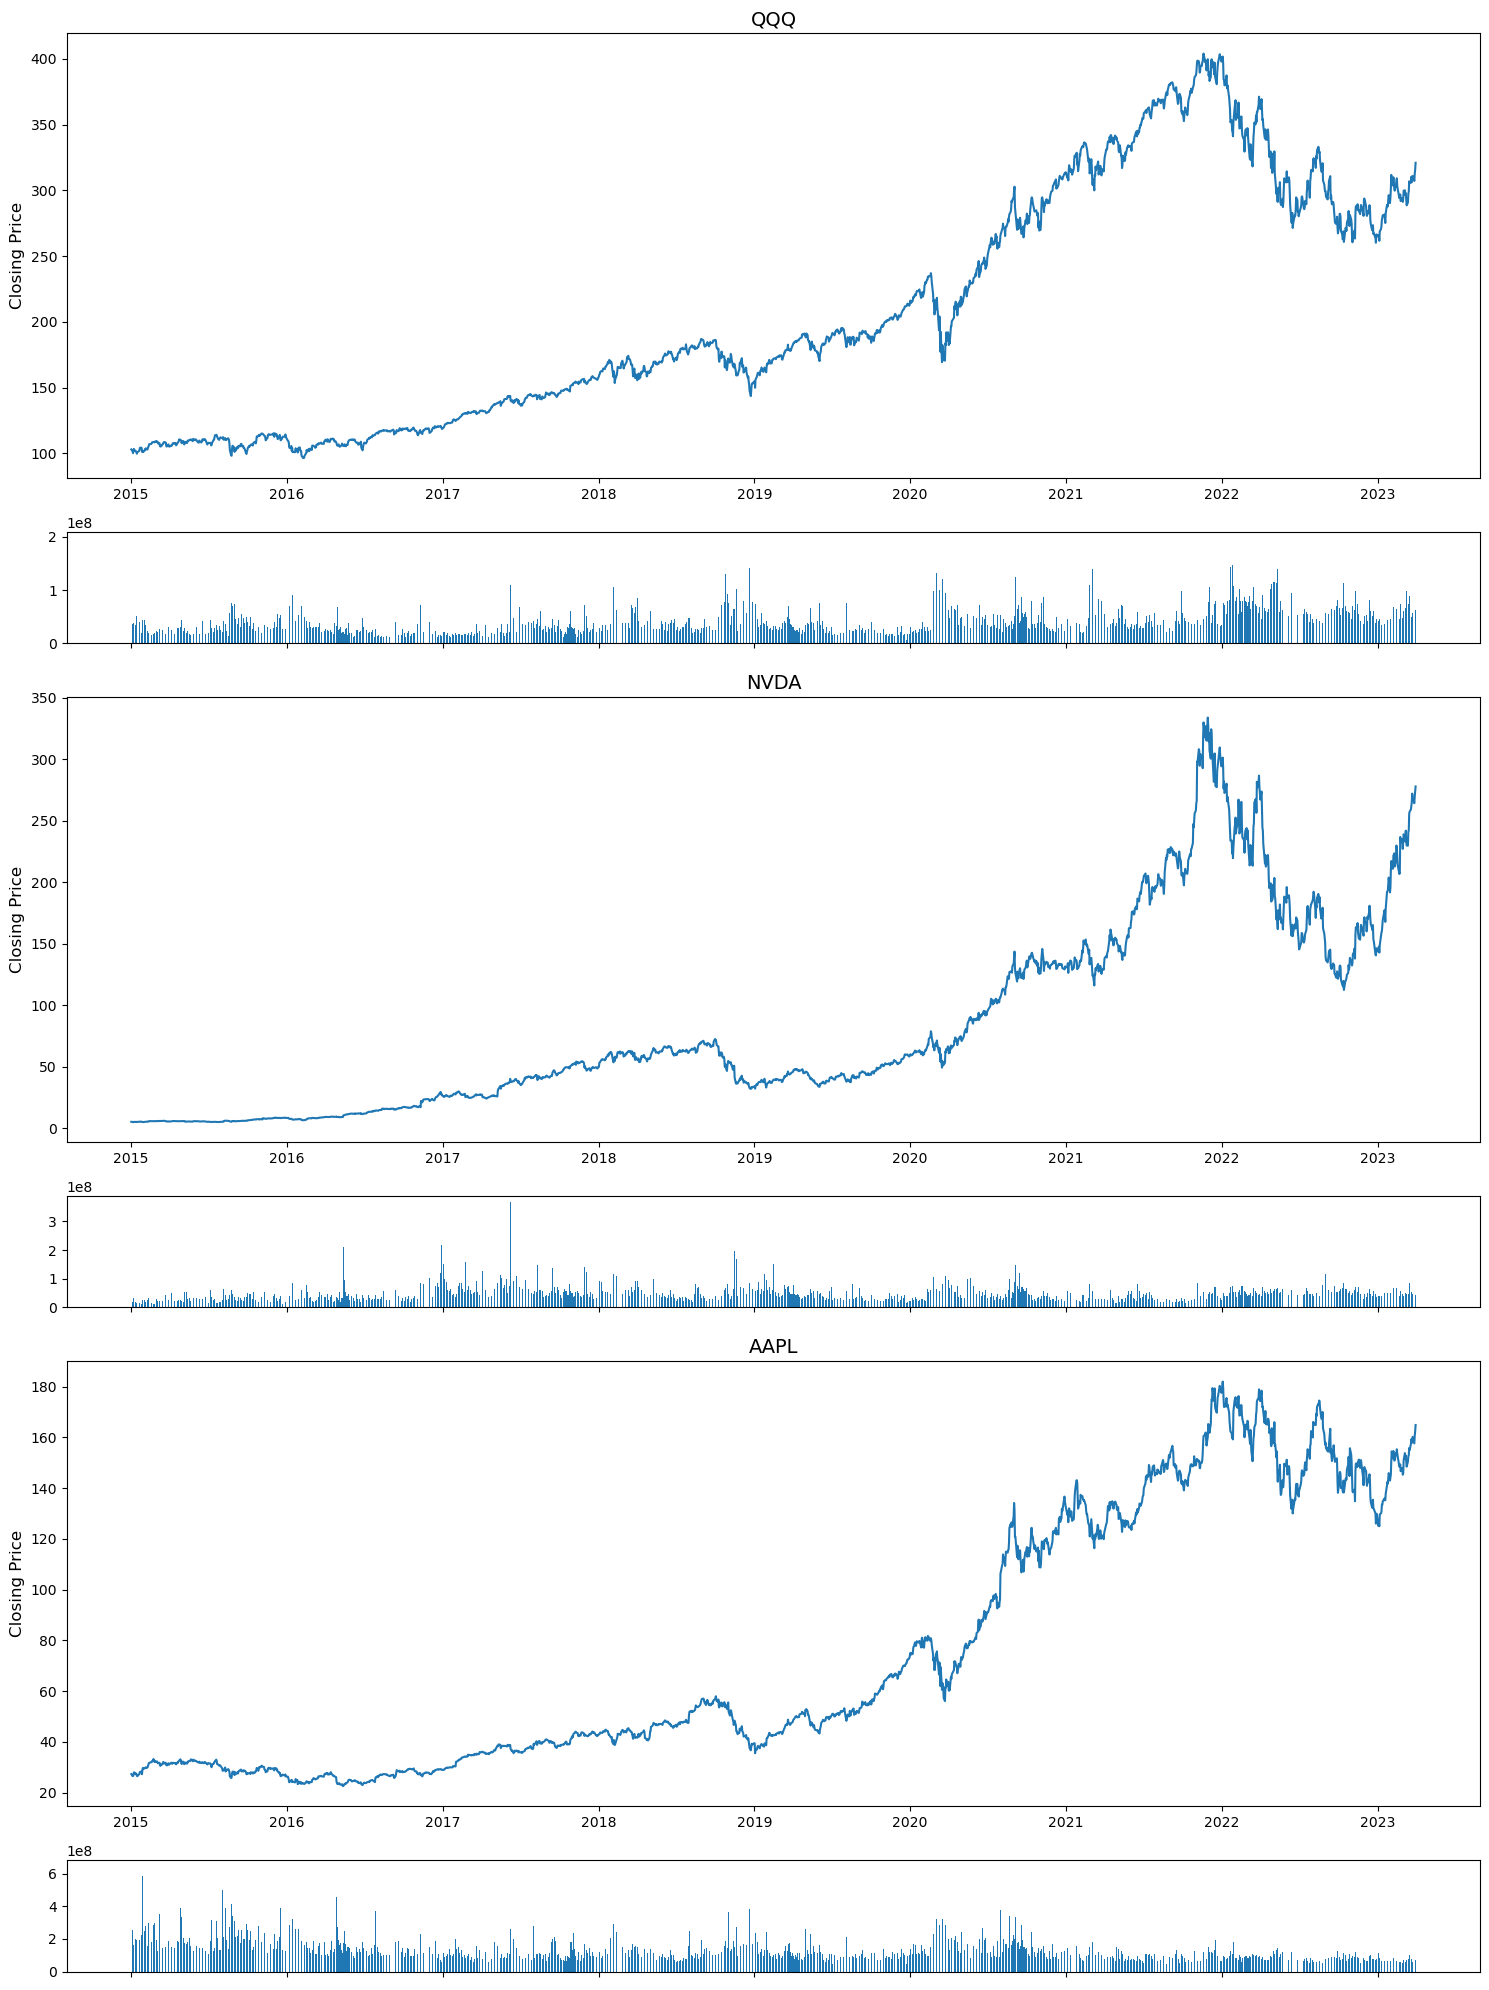

In [18]:
import matplotlib.gridspec as gridspec

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 20), sharex=True,
                        gridspec_kw={'height_ratios': [2, 0.5, 2, 0.5, 2, 0.5]})

plt_price_Q = plt.subplot(6,1,1,sharex=plt_price_Q)  # 6 rows, 1 column, 1st plot
plt_price_Q.plot(df_QQQ['Date'], df_QQQ['Close'])
plt.ylabel('Closing Price',fontsize=12)
plt.title('QQQ',fontsize=14)
plt_Vol_QQQ = plt.subplot(6,1,2)  # 6 rows, 1 column, 2nd plot (volume)
plt_Vol_QQQ.bar(df_QQQ['Date'], df_QQQ['Volume'])

plt_price_N = plt.subplot(6,1,3,sharex=plt_price_Q)  # 6 rows, 1 column, 3rd plot
plt_price_N.plot(df_NVDA['Date'], df_NVDA['Close'])
plt.ylabel('Closing Price',fontsize=12)
plt.title('NVDA',fontsize=14)
plt_Vol_NVDA = plt.subplot(6,1,4)  # 6 rows, 1 column, 4th plot (volume)
plt_Vol_NVDA.bar(df_NVDA['Date'], df_NVDA['Volume'])

plt_price_A = plt.subplot(6,1,5,sharex=plt_price_Q)  # 6 rows, 1 column, 5th plot
plt_price_A.plot(df_AAPL['Date'], df_AAPL['Close'])
plt.ylabel('Closing Price',fontsize=12)
plt.title('AAPL',fontsize=14)
plt_Vol_AAPL = plt.subplot(6,1,6)  # 6 rows, 1 column, 6th plot (volume)
plt_Vol_AAPL.bar(df_AAPL['Date'], df_AAPL['Volume'])
plt_Vol_AAPL.set_xticklabels([])

plt.tight_layout()
plt.show()

C:\Users\seyed\AppData\Local\Temp\ipykernel_21132\668508854.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt_price_Q = plt.subplot(3,1,1)
C:\Users\seyed\AppData\Local\Temp\ipykernel_21132\668508854.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt_price_N = plt.subplot(3,1,2)
C:\Users\seyed\AppData\Local\Temp\ipykernel_21132\668508854.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt_price_A = plt.subplot(3,1,3)


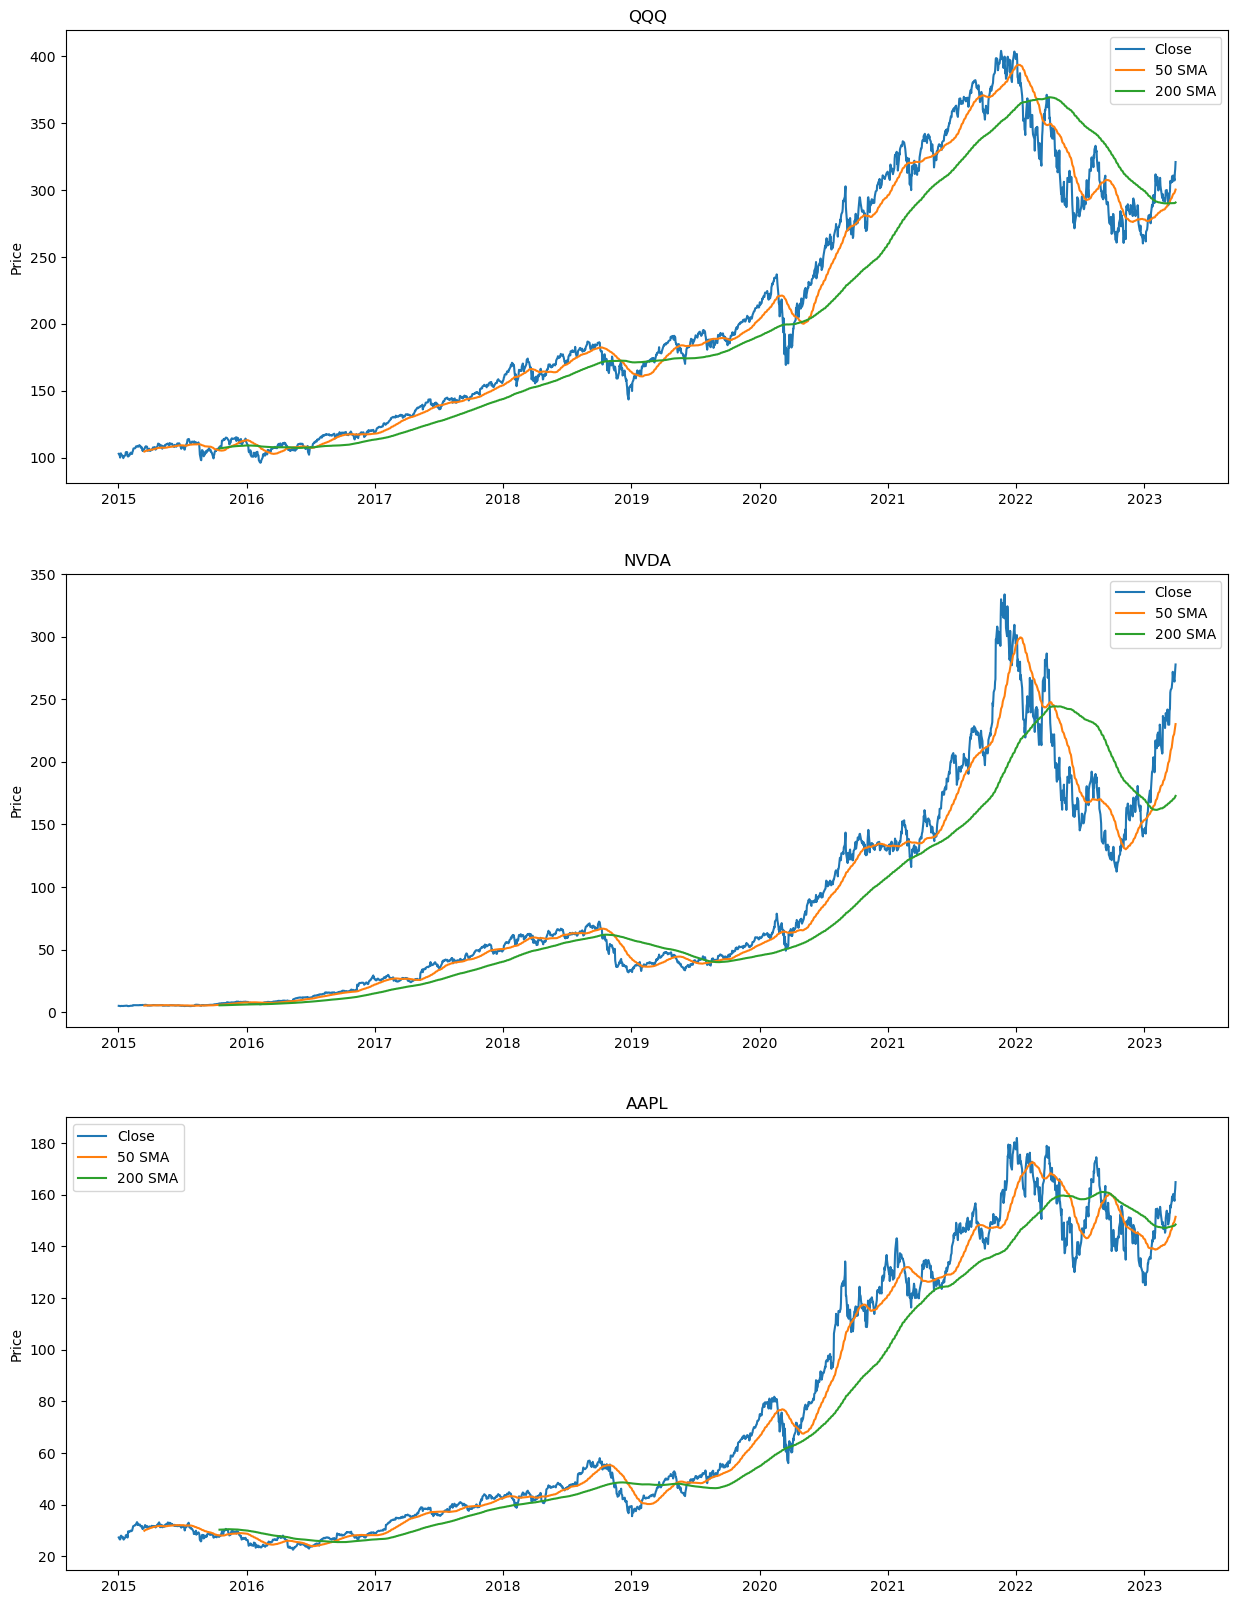

In [19]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 20), sharex=True,
                        gridspec_kw={'height_ratios': [2, 0.5, 2, 0.5, 2, 0.5]})

ma50_QQQ = df_QQQ['Close'].rolling(window=50).mean()
ma200_QQQ = df_QQQ['Close'].rolling(window=200).mean()

ma50_NVDA = df_NVDA['Close'].rolling(window=50).mean()
ma200_NVDA = df_NVDA['Close'].rolling(window=200).mean()

ma50_AAPL = df_AAPL['Close'].rolling(window=50).mean()
ma200_AAPL = df_AAPL['Close'].rolling(window=200).mean()

#QQQ plot
plt_price_Q = plt.subplot(3,1,1)
plt_price_Q.plot(df_QQQ['Date'], df_QQQ['Close'], label='Close')
plt.plot(df_QQQ['Date'], ma50_QQQ, label='50 SMA')
plt.plot(df_QQQ['Date'], ma200_QQQ, label='200 SMA')
plt.ylabel('Price')
plt.title('QQQ')
plt.legend()


# NVDA plot
plt_price_N = plt.subplot(3,1,2) 
plt_price_N.plot(df_NVDA['Date'], df_NVDA['Close'], label='Close')
plt.plot(df_NVDA['Date'], ma50_NVDA, label='50 SMA')
plt.plot(df_NVDA['Date'], ma200_NVDA, label='200 SMA')
plt.ylabel('Price')
plt.title('NVDA')
plt.legend()

# AAPL plot
plt_price_A = plt.subplot(3,1,3) 
plt_price_A.plot(df_AAPL['Date'], df_AAPL['Close'], label='Close')
plt.plot(df_AAPL['Date'], ma50_AAPL, label='50 SMA')
plt.plot(df_AAPL['Date'], ma200_AAPL, label='200 SMA')
plt.ylabel('Price')
plt.title('AAPL')
plt.legend()

In [20]:
pivot_df.corr()

company_name,AAPL,NVDA,QQQ
company_name,,,
AAPL,1.000000,0.953670,0.968527
NVDA,0.953670,1.000000,0.953248
QQQ,0.968527,0.953248,1.000000


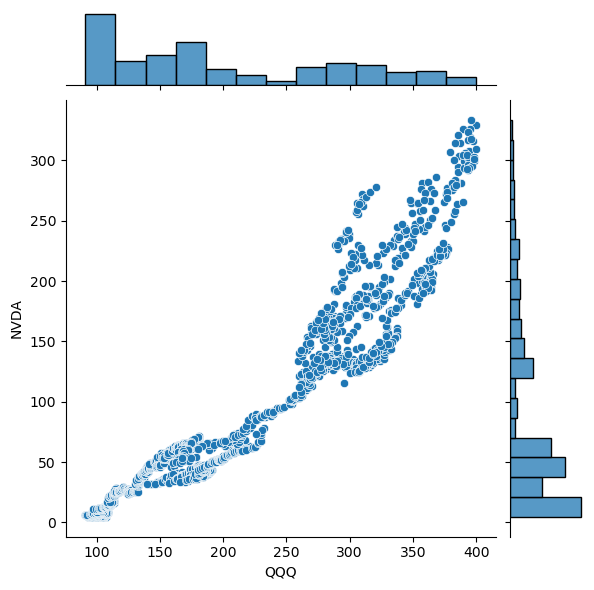

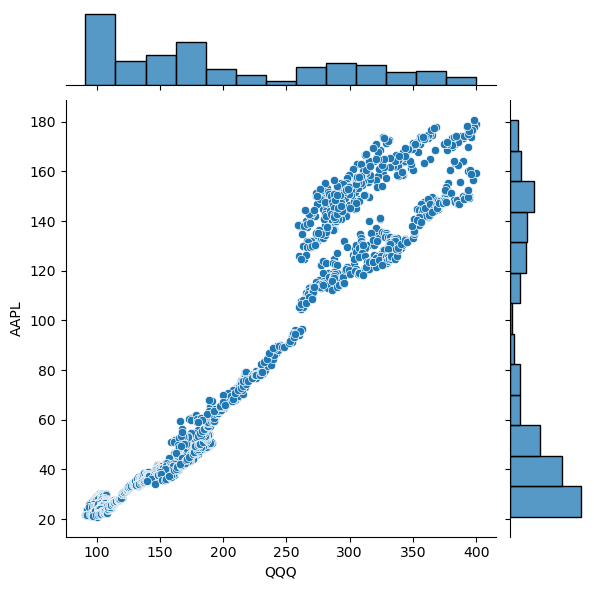

In [21]:
sns.jointplot(data=pivot_df,x='QQQ',y='NVDA', kind='scatter')
sns.jointplot(data=pivot_df,x='QQQ',y='AAPL', kind='scatter')

In [22]:
df_QQQ_Close = df_QQQ['Close']
df_QQQ_Close

0       102.940002
1       101.430000
2       100.070000
3       101.360001
4       103.300003
           ...    
2071    308.760010
2072    307.119995
2073    312.720001
2074    315.679993
2075    320.929993
Name: Close, Length: 2076, dtype: float64

In [23]:
df_QQQ_Close=df_QQQ_Close.values.reshape(-1,1)
df_QQQ_Close.shape

(2076, 1)

In [24]:
scaler = MinMaxScaler()
scaler.fit(df_QQQ_Close[:int(len(df_QQQ)*0.7)])
df_QQQ_Close = scaler.transform(df_QQQ_Close).flatten()

In [46]:
T = 15
D = 1

# Create X and Y arrays using list comprehension
X = np.array([df_QQQ_Close[t:t+T] for t in range(len(df_QQQ_Close) - T)]).reshape(-1, T, D)
Y = np.array([df_QQQ_Close[t+T] for t in range(len(df_QQQ_Close) - T)])

N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2061, 15, 1) Y.shape (2061,)


In [47]:
model = Sequential([
  LSTM(10, input_shape=(T,1)),
  Dense(1)
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.01),)

r=model.fit(X[:-N//2],Y[:-N//2],epochs=150,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/150
33/33 [==============================] - 1s 12ms/step - loss: 0.0068 - val_loss: 0.0512
Epoch 2/150
33/33 [==============================] - 0s 5ms/step - loss: 2.6023e-04 - val_loss: 0.0584
Epoch 3/150
33/33 [==============================] - 0s 5ms/step - loss: 1.7041e-04 - val_loss: 0.0614
Epoch 4/150
33/33 [==============================] - 0s 5ms/step - loss: 1.6174e-04 - val_loss: 0.0638
Epoch 5/150
33/33 [==============================] - 0s 5ms/step - loss: 1.5694e-04 - val_loss: 0.0649
Epoch 6/150
33/33 [==============================] - 0s 5ms/step - loss: 1.5486e-04 - val_loss: 0.0649
Epoch 7/150
33/33 [==============================] - 0s 5ms/step - loss: 1.4694e-04 - val_loss: 0.0605
Epoch 8/150
33/33 [==============================] - 0s 5ms/step - loss: 1.4646e-04 - val_loss: 0.0610
Epoch 9/150
33/33 [==============================] - 0s 5ms/step - loss: 1.4195e-04 - val_loss: 0.0612
Epoch 10/150
33/33 [==============================] - 0s 5ms/step - loss: 1.

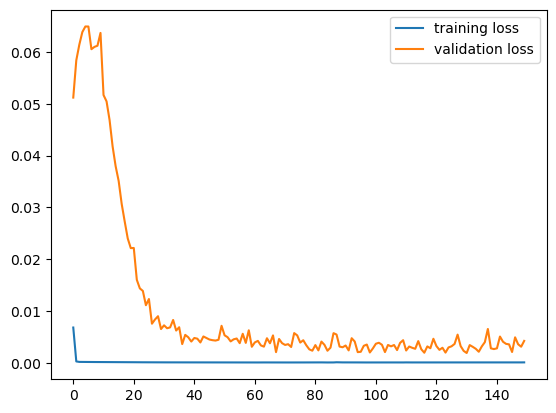

In [48]:
plt.plot(r.history['loss'],label='training loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()

65/65 [==============================] - 0s 1ms/step
(2061, 1)


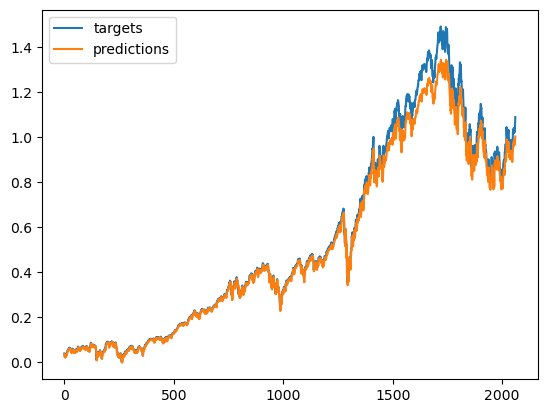

In [49]:
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

In [32]:
df_AAPL_Close = df_AAPL['Close']
df_AAPL_Close

0        27.332500
1        26.562500
2        26.565001
3        26.937500
4        27.972500
           ...    
2071    158.279999
2072    157.649994
2073    160.770004
2074    162.360001
2075    164.899994
Name: Close, Length: 2076, dtype: float64

In [33]:
df_AAPL_Close=df_AAPL_Close.values.reshape(-1,1)
df_AAPL_Close.shape

(2076, 1)

In [34]:
scaler = MinMaxScaler()
scaler.fit(df_AAPL_Close[:int(len(df_AAPL)*0.7)])
df_AAPL_Close = scaler.transform(df_AAPL_Close).flatten()

In [35]:
T = 15
D = 1

# Create X and Y arrays using list comprehension
X1 = np.array([df_AAPL_Close[t:t+T] for t in range(len(df_AAPL_Close) - T)]).reshape(-1, T, D)
Y1 = np.array([df_AAPL_Close[t+T] for t in range(len(df_AAPL_Close) - T)])

N = len(X1)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2061, 15, 1) Y.shape (2061,)


In [36]:
model = Sequential([
  LSTM(10, input_shape=(T,1)),
  Dense(1)
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.01),)

r=model.fit(X1[:-N//2],Y1[:-N//2],epochs=150,validation_data=(X1[-N//2:],Y1[-N//2:]))

Epoch 1/150
33/33 [==============================] - 1s 12ms/step - loss: 4.0414e-04 - val_loss: 0.0365
Epoch 2/150
33/33 [==============================] - 0s 5ms/step - loss: 6.8224e-05 - val_loss: 0.0283
Epoch 3/150
33/33 [==============================] - 0s 5ms/step - loss: 5.8933e-05 - val_loss: 0.0267
Epoch 4/150
33/33 [==============================] - 0s 5ms/step - loss: 5.8449e-05 - val_loss: 0.0217
Epoch 5/150
33/33 [==============================] - 0s 5ms/step - loss: 6.1203e-05 - val_loss: 0.0157
Epoch 6/150
33/33 [==============================] - 0s 5ms/step - loss: 5.8335e-05 - val_loss: 0.0123
Epoch 7/150
33/33 [==============================] - 0s 5ms/step - loss: 5.2742e-05 - val_loss: 0.0112
Epoch 8/150
33/33 [==============================] - 0s 5ms/step - loss: 5.2566e-05 - val_loss: 0.0073
Epoch 9/150
33/33 [==============================] - 0s 5ms/step - loss: 6.7812e-05 - val_loss: 0.0055
Epoch 10/150
33/33 [==============================] - 0s 5ms/step - loss

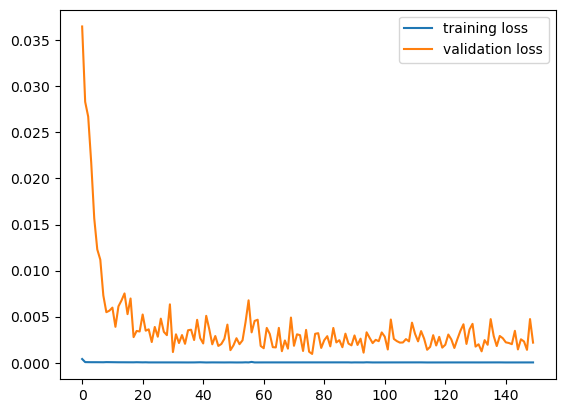

In [37]:
plt.plot(r.history['loss'],label='training loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()

65/65 [==============================] - 0s 1ms/step
(2061, 1)


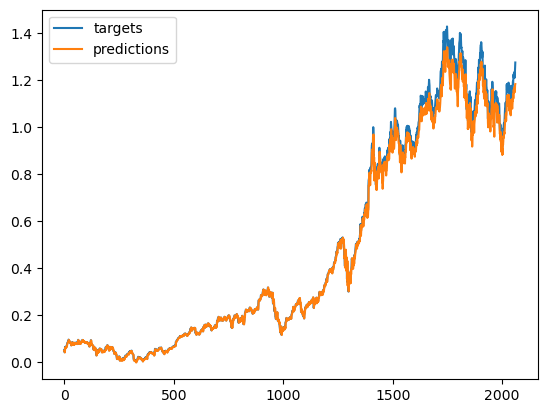

In [38]:
outputs=model.predict(X1)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y1,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

In [39]:
df_NVDA_Close = df_NVDA['Close']
df_NVDA_Close

0         5.032500
1         4.947500
2         4.797500
3         4.785000
4         4.965000
           ...    
2071    265.309998
2072    264.100006
2073    269.839996
2074    273.829987
2075    277.769989
Name: Close, Length: 2076, dtype: float64

In [40]:
df_NVDA_Close=df_NVDA_Close.values.reshape(-1,1)
df_NVDA_Close.shape

(2076, 1)

In [41]:
scaler = MinMaxScaler()
scaler.fit(df_NVDA_Close[:int(len(df_NVDA)*0.7)])
df_NVDA_Close = scaler.transform(df_NVDA_Close).flatten()

In [42]:
T = 15
D = 1

# Create X and Y arrays using list comprehension
X2 = np.array([df_NVDA_Close[t:t+T] for t in range(len(df_NVDA_Close) - T)]).reshape(-1, T, D)
Y2 = np.array([df_NVDA_Close[t+T] for t in range(len(df_NVDA_Close) - T)])

N = len(X1)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2061, 15, 1) Y.shape (2061,)


In [43]:
model = Sequential([
  LSTM(10, input_shape=(T,1)),
  Dense(1)
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.01),)

r=model.fit(X2[:-N//2],Y2[:-N//2],epochs=150,validation_data=(X2[-N//2:],Y2[-N//2:]))

Epoch 1/150
33/33 [==============================] - 1s 12ms/step - loss: 0.0076 - val_loss: 0.1070
Epoch 2/150
33/33 [==============================] - 0s 5ms/step - loss: 3.3164e-04 - val_loss: 0.1096
Epoch 3/150
33/33 [==============================] - 0s 5ms/step - loss: 1.5802e-04 - val_loss: 0.1169
Epoch 4/150
33/33 [==============================] - 0s 5ms/step - loss: 1.5049e-04 - val_loss: 0.1186
Epoch 5/150
33/33 [==============================] - 0s 5ms/step - loss: 1.4362e-04 - val_loss: 0.1144
Epoch 6/150
33/33 [==============================] - 0s 5ms/step - loss: 1.5164e-04 - val_loss: 0.1116
Epoch 7/150
33/33 [==============================] - 0s 5ms/step - loss: 1.2823e-04 - val_loss: 0.1055
Epoch 8/150
33/33 [==============================] - 0s 5ms/step - loss: 1.3061e-04 - val_loss: 0.1031
Epoch 9/150
33/33 [==============================] - 0s 5ms/step - loss: 1.2567e-04 - val_loss: 0.0885
Epoch 10/150
33/33 [==============================] - 0s 5ms/step - loss: 1.

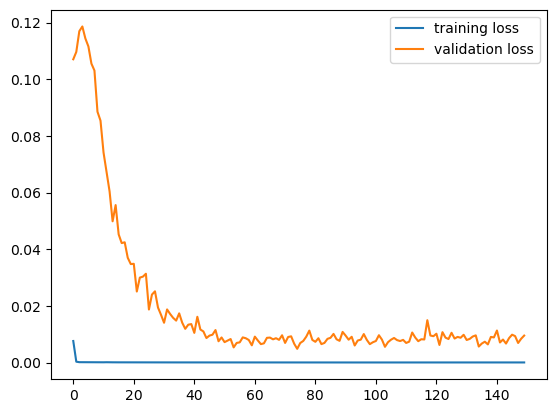

In [44]:
plt.plot(r.history['loss'],label='training loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()

65/65 [==============================] - 0s 1ms/step
(2061, 1)


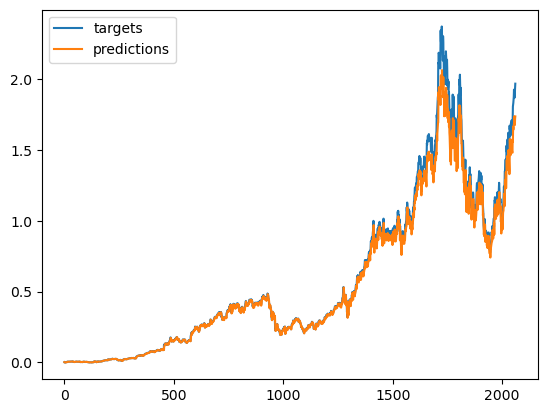

In [45]:
outputs=model.predict(X2)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y2,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()